In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Phishing_Email.csv")

**EDA**

In [3]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [4]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [5]:
df.shape

(18650, 3)

In [6]:
df.describe(include='all')

,Unnamed: 0,Email Text,Email Type
count,18650.000000,18634,18650
unique,NaN,17537,2
top,NaN,empty,Safe Email
freq,NaN,533,11322
mean,9325.154477,NaN,NaN
std,5384.327293,NaN,NaN
min,0.000000,NaN,NaN
25%,4662.250000,NaN,NaN
50%,9325.500000,NaN,NaN
75%,13987.750000,NaN,NaN


In [7]:
df.columns.tolist()

['Unnamed: 0', 'Email Text', 'Email Type']

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
Email Text,16
Email Type,0


In [9]:
 df['Email Type'].value_counts()

,count
Email Type,
Safe Email,11322
Phishing Email,7328


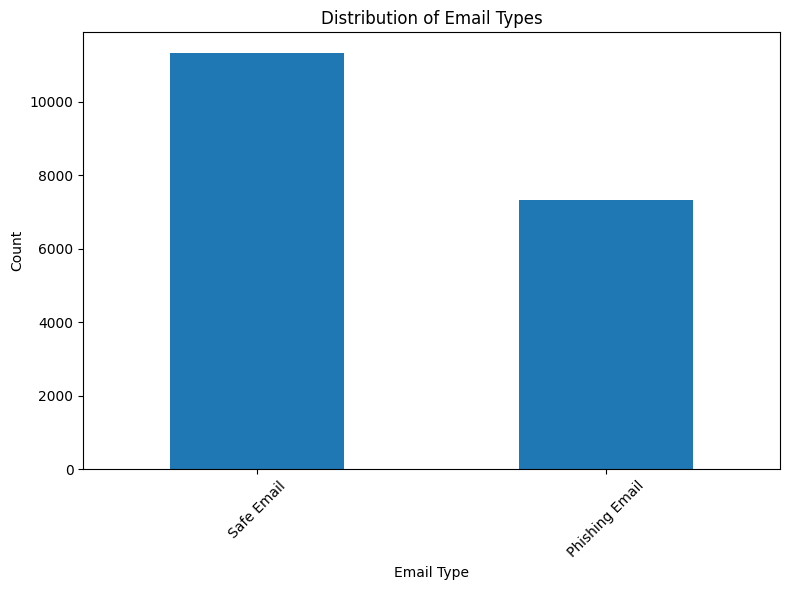

In [10]:
#bar graph of Email Type distribution

import matplotlib.pyplot as plt
email_type_counts = df['Email Type'].value_counts()
plt.figure(figsize=(8, 6))
email_type_counts.plot(kind='bar')
plt.title('Distribution of Email Types')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

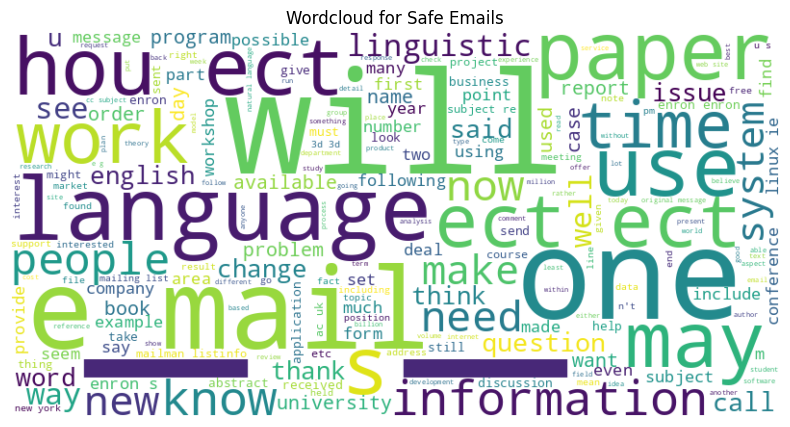

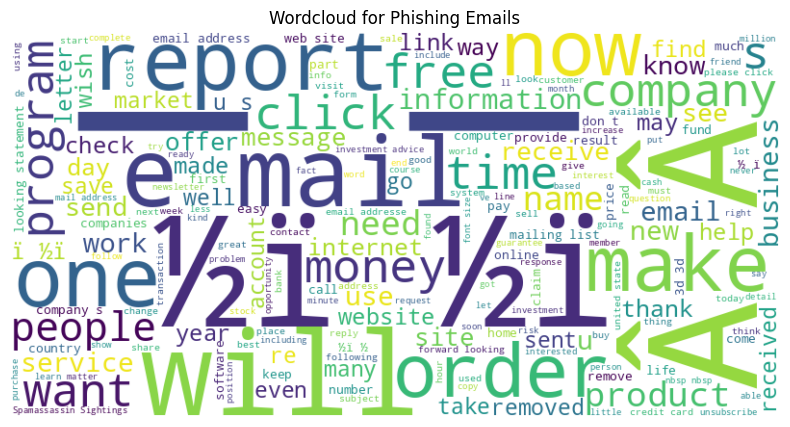

In [11]:


!pip install wordcloud

from wordcloud import WordCloud

# Separate emails by type
safe_emails = df[df['Email Type'] == 'Safe Email']['Email Text'].str.cat(sep=' ')
phishing_emails = df[df['Email Type'] == 'Phishing Email']['Email Text'].str.cat(sep=' ')

# Generate wordcloud for safe emails
wordcloud_safe = WordCloud(width=800, height=400, background_color='white').generate(safe_emails)

# Plot the wordcloud for safe emails
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_safe, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Safe Emails')
plt.show()

# Generate wordcloud for phishing emails
wordcloud_phishing = WordCloud(width=800, height=400, background_color='white').generate(phishing_emails)

# Plot the wordcloud for phishing emails
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_phishing, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Phishing Emails')
plt.show()


**DATA PREPROCESSING**

In [12]:
df.dropna()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...,...
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,18649,press clippings - letter on californian utilit...,Safe Email


In [16]:
# Removing unwanted characters/punctuation
import re
import pandas as pd # Import pandas

def remove_unwanted_chars(text):
    if isinstance(text, str): # Check if the input is a string
        text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters and spaces
    else:
        text = "" # Or handle non-string values as appropriate (e.g., return empty string)
    return text

df['Email Text'] = df['Email Text'].apply(remove_unwanted_chars)

In [17]:
# Lowercasing
df['Email Text'] = df['Email Text'].str.lower()

In [18]:
# Tokenizing
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

df['Email Text'] = df['Email Text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [19]:
# Removing stop words
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['Email Text'] = df['Email Text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
# Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

df['Email Text'] = df['Email Text'].apply(stem_tokens)

In [21]:
from google.colab import files

df.to_csv('cleaned_data.csv', index=False)
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Model**

In [22]:
# Prepare data for modeling
# Join the processed tokens back into strings
df['Processed Text'] = df['Email Text'].apply(lambda tokens: " ".join(tokens))

# Split data into features (X) and target (y)
X = df['Processed Text']
y = df['Email Type']

In [23]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
# Vectorize the text data using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [25]:
# Train a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [26]:
# Evaluate the model (optional, but recommended)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = model.predict(X_test_vectorized)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9176943699731903
Classification Report:
                 precision    recall  f1-score   support

Phishing Email       0.97      0.82      0.89      1457
    Safe Email       0.89      0.98      0.94      2273

      accuracy                           0.92      3730
     macro avg       0.93      0.90      0.91      3730
  weighted avg       0.92      0.92      0.92      3730

Confusion Matrix:
 [[1190  267]
 [  40 2233]]


**Console**

In [ ]:
# Implement the console for user input classification

def classify_user_input(text, model, vectorizer, remove_unwanted_chars, word_tokenize, remove_stopwords, stem_tokens):
    # Apply the same preprocessing steps to the user input
    cleaned_text = remove_unwanted_chars(text)
    lowercased_text = cleaned_text.lower()
    tokenized_text = word_tokenize(lowercased_text)
    stopwords_removed_text = remove_stopwords(tokenized_text)
    stemmed_text = stem_tokens(stopwords_removed_text)

    # Join the stemmed tokens back into a string for vectorization
    processed_text = " ".join(stemmed_text)

    # Vectorize the preprocessed text using the trained vectorizer
    vectorized_text = vectorizer.transform([processed_text])

    # Make a prediction
    prediction = model.predict(vectorized_text)

    return prediction[0]

# Start the console loop
print("Enter text to classify (type 'quit' to exit):")
while True:
    user_input = input("> ")
    if user_input.lower() == 'quit':
        break
    else:
        classification_result = classify_user_input(
            user_input,
            model,
            vectorizer,
            remove_unwanted_chars,
            word_tokenize,
            remove_stopwords,
            stem_tokens
        )
        print(f"Classification: {classification_result}")

print("Console exited.")

Enter text to classify (type 'quit' to exit):
Classification: Phishing Email
Classification: Phishing Email
Classification: Safe Email
